In [14]:
from fxpmath import Fxp
import sys
sys.path.append('../src')
from dataloader import WisdmDatasetParser, WisdmDataset
from torch.utils.data import  DataLoader

dataset = WisdmDatasetParser('../data/watch_subset2_40.npz', norm=None)
train_set = dataset.get_training_set()


(6,)
(6,)
num classes train dataset: 7 occurrences of each class:[3189 2987 3083 3262 3046 3071 3082]
num classes eval dataset: 7 occurrences of each class:[1050 1017  982  998 1058 1055 1080]
num classes test dataset: 7 occurrences of each class:[1031  948 1014 1076 1062 1038 1072]


In [15]:
import numpy as np

# Convert the list of arrays into a single NumPy array
data, label = train_set[0], train_set[1]
print(data.shape)


(21720, 6, 40)


In [16]:
import numpy as np

# Assuming your 3-dimensional NumPy array is named 'data'
# Shape: (sample, axis, time)

# Calculate the maximum along axis 0 (sample)
max_axis0 = np.max(data, axis=(0,2))

# Calculate the minimum along axis 0 (sample)
min_axis0 = np.min(data, axis=(0,2))

# Calculate the average along axis 0 (sample)
avg_axis0 = np.mean(data, axis=(0,2))

# Calculate the standard deviation along axis 0 (sample)
std_axis0 = np.std(data, axis=(0, 2))

print(f"these are the data stats: max: {max_axis0}, min: {min_axis0}, avg: {avg_axis0}, std: {std_axis0}")

# Assuming your np array is named 'data'
# Shape: (samples, axis, time)

# Calculate the difference between subsequent timesteps along the time axis
diff_axis2 = abs(np.diff(data, axis=2))

# Calculate the minimum variation over all the samples
min_variation = np.min(diff_axis2[diff_axis2 > 0])

print(f"Minimum variation: {min_variation}")


these are the data stats: max: [49.03803  32.126793 34.90443  31.077774 34.90443  34.898655], min: [-52.96107  -67.76229  -51.23426  -44.954517 -52.125206 -42.339157], avg: [-0.47645546 -0.53575601 -0.35945965 -0.49053146 -0.5429299  -0.35777403], std: [4.91975551 4.83078621 4.6975787  4.90403629 4.80877922 4.71295851]
Minimum variation: 4.336808689942018e-19


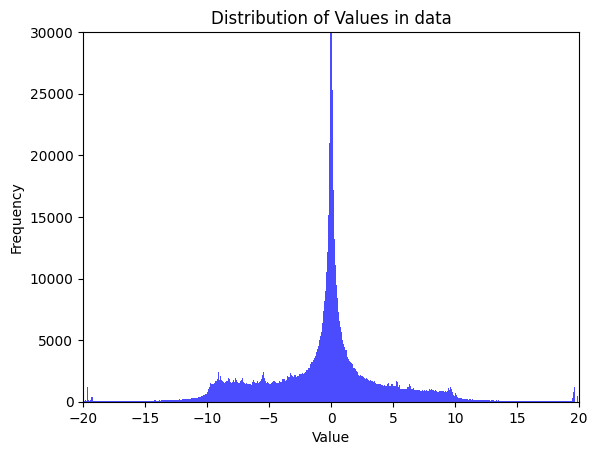

In [24]:
import matplotlib.pyplot as plt

# Flatten the data array
data_flat = data.flatten()

# Plot the histogram
plt.hist(data_flat, bins=10000, color='blue', alpha=0.7)
plt.ylim(0, 30000)
#plt.xlim(-40, 40)
plt.xlim(-20, 20)
# Set the plot title and labels
plt.title('Distribution of Values in data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()
